In [48]:
%pip install kagglehub --quiet


Note: you may need to restart the kernel to use updated packages.


In [16]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [17]:
df = pd.read_csv(f"{path}/all-weeks-global.csv", encoding='latin1')

In [18]:
df.columns
df.head()


,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
0,2023-12-17,Films (English),1,Leave the World Behind,NaN,106200000,2.3667,44900000.0,2,False,NaN
1,2023-12-17,Films (English),2,Chicken Run: Dawn of the Nugget,NaN,20300000,1.7000,11900000.0,1,False,NaN
2,2023-12-17,Films (English),3,Leo,NaN,16800000,1.7833,9400000.0,4,False,NaN
3,2023-12-17,Films (English),4,Family Switch,NaN,16600000,1.7667,9400000.0,3,False,NaN
4,2023-12-17,Films (English),5,The Super Mario Bros. Movie,NaN,13700000,1.5333,8900000.0,3,False,NaN


In [19]:
df.columns
df.head()

,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
0,2023-12-17,Films (English),1,Leave the World Behind,NaN,106200000,2.3667,44900000.0,2,False,NaN
1,2023-12-17,Films (English),2,Chicken Run: Dawn of the Nugget,NaN,20300000,1.7000,11900000.0,1,False,NaN
2,2023-12-17,Films (English),3,Leo,NaN,16800000,1.7833,9400000.0,4,False,NaN
3,2023-12-17,Films (English),4,Family Switch,NaN,16600000,1.7667,9400000.0,3,False,NaN
4,2023-12-17,Films (English),5,The Super Mario Bros. Movie,NaN,13700000,1.5333,8900000.0,3,False,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5160 entries, 0 to 5159
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   week                        5160 non-null   object 
 1   category                    5160 non-null   object 
 2   weekly_rank                 5160 non-null   int64  
 3   show_title                  5160 non-null   object 
 4   season_title                2498 non-null   object 
 5   weekly_hours_viewed         5160 non-null   int64  
 6   runtime                     1080 non-null   float64
 7   weekly_views                1080 non-null   float64
 8   cumulative_weeks_in_top_10  5160 non-null   int64  
 9   is_staggered_launch         5160 non-null   bool   
 10  episode_launch_details      40 non-null     object 
dtypes: bool(1), float64(2), int64(3), object(5)
memory usage: 408.3+ KB


In [25]:
# Convert 'week' to datetime
df['week'] = pd.to_datetime(df['week'])

# Filter last 12 months of data
last_year_df = df[df['week'] >= '2024-06-01'].copy()

# Drop rows without a title (precaution)
last_year_df.dropna(subset=['show_title'], inplace=True)


# Preview
print("Filtered rows:", len(last_year_df))
last_year_df.head()

Filtered rows: 0


,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details


In [26]:
df['week'].max()
df['week'].min()


Timestamp('2021-07-04 00:00:00')

In [27]:
# Get the latest available date
latest_date = df['week'].max()

# Subtract 12 months from it
from datetime import timedelta
start_date = latest_date - pd.DateOffset(months=12)

# Filter to last 12 available months
last_year_df = df[(df['week'] >= start_date) & (df['week'] <= latest_date)].copy()

print("Filtered rows:", len(last_year_df))
last_year_df.head()


Filtered rows: 2120


,week,category,weekly_rank,show_title,season_title,weekly_hours_viewed,runtime,weekly_views,cumulative_weeks_in_top_10,is_staggered_launch,episode_launch_details
0,2023-12-17,Films (English),1,Leave the World Behind,NaN,106200000,2.3667,44900000.0,2,False,NaN
1,2023-12-17,Films (English),2,Chicken Run: Dawn of the Nugget,NaN,20300000,1.7000,11900000.0,1,False,NaN
2,2023-12-17,Films (English),3,Leo,NaN,16800000,1.7833,9400000.0,4,False,NaN
3,2023-12-17,Films (English),4,Family Switch,NaN,16600000,1.7667,9400000.0,3,False,NaN
4,2023-12-17,Films (English),5,The Super Mario Bros. Movie,NaN,13700000,1.5333,8900000.0,3,False,NaN


In [29]:
# Convert titles to lowercase for consistent matching
last_year_df['show_title_lower'] = last_year_df['show_title'].str.lower()

# Flag horror titles using keyword matching
horror_keywords = [
    "horror", "ghost", "haunting", "dead", "zombie", "vampire", "killer",
    "dark", "demon", "curse", "nightmare", "paranormal", "evil", "insidious",
    "possession", "fear", "the conjuring", "it", "saw", "quiet place"
]

last_year_df['is_horror'] = last_year_df['show_title_lower'].apply(
    lambda x: any(keyword in x for keyword in horror_keywords)
)

# Preview horror-marked data
last_year_df[['show_title', 'is_horror']].head(10)


,show_title,is_horror
0,Leave the World Behind,False
1,Chicken Run: Dawn of the Nugget,False
2,Leo,False
3,Family Switch,True
4,The Super Mario Bros. Movie,False
5,Underwater,False
6,Old,False
7,Christmas as Usual,False
8,Dr. Seuss' The Grinch,False
9,Holiday in the Vineyards,False


In [30]:
# Summarize viewership for Horror vs Others
view_summary = last_year_df.groupby('is_horror')['weekly_hours_viewed'].agg(
    total_hours='sum',
    average_hours='mean',
    title_count='count'
).reset_index()

view_summary


,is_horror,total_hours,average_hours,title_count
0,False,32550810000,1.690951e+07,1925
1,True,3319320000,1.702215e+07,195


In [31]:
# Filter only horror titles
horror_df = last_year_df[last_year_df['is_horror'] == True]

# Group by show title and sum up hours
top_horror = horror_df.groupby('show_title')['weekly_hours_viewed'].sum().reset_index()

# Sort by most watched
top_horror = top_horror.sort_values(by='weekly_hours_viewed', ascending=False).head(10)

top_horror


,show_title,weekly_hours_viewed
67,The Witcher,384400000
63,The Recruit,228260000
78,"XO, Kitty",180150000
39,My Life With the Walter Boys,154900000
15,Destined with You,146000000
42,Obliterated,144700000
43,Painkiller,144600000
59,The Killer,124800000
7,Celebrity,113200000
74,We Have a Ghost,105980000


/tmp/ipykernel_12323/3727216894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_horror, x='weekly_hours_viewed', y='show_title', palette='Reds_r')


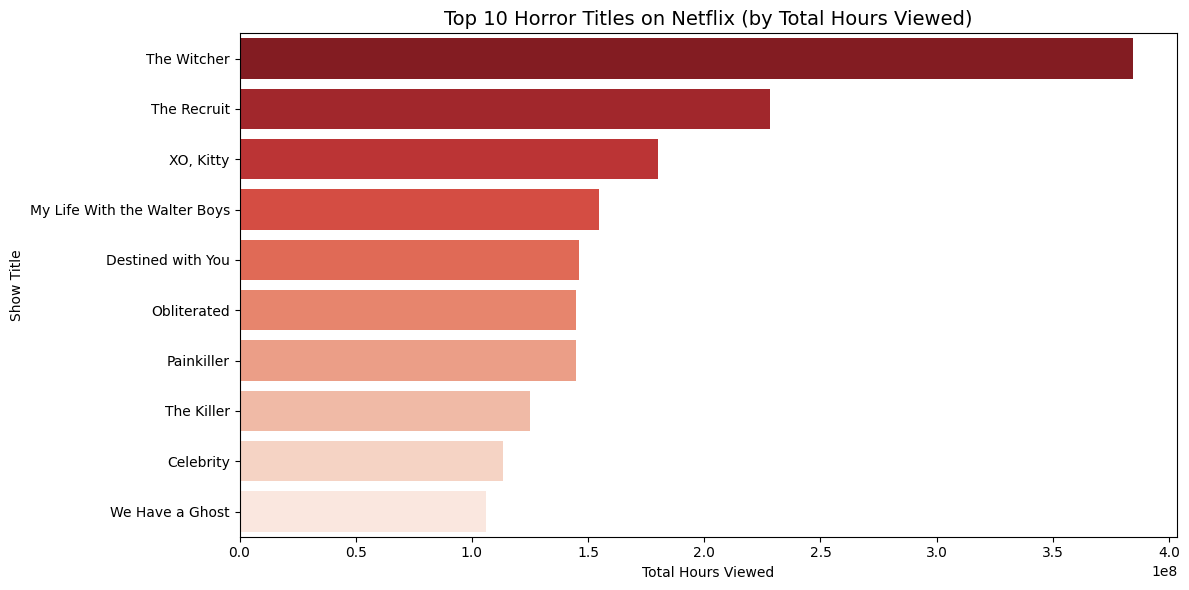

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure style
plt.figure(figsize=(12, 6))
sns.barplot(data=top_horror, x='weekly_hours_viewed', y='show_title', palette='Reds_r')

# Add labels and title
plt.title("Top 10 Horror Titles on Netflix (by Total Hours Viewed)", fontsize=14)
plt.xlabel("Total Hours Viewed")
plt.ylabel("Show Title")
plt.tight_layout()
plt.show()


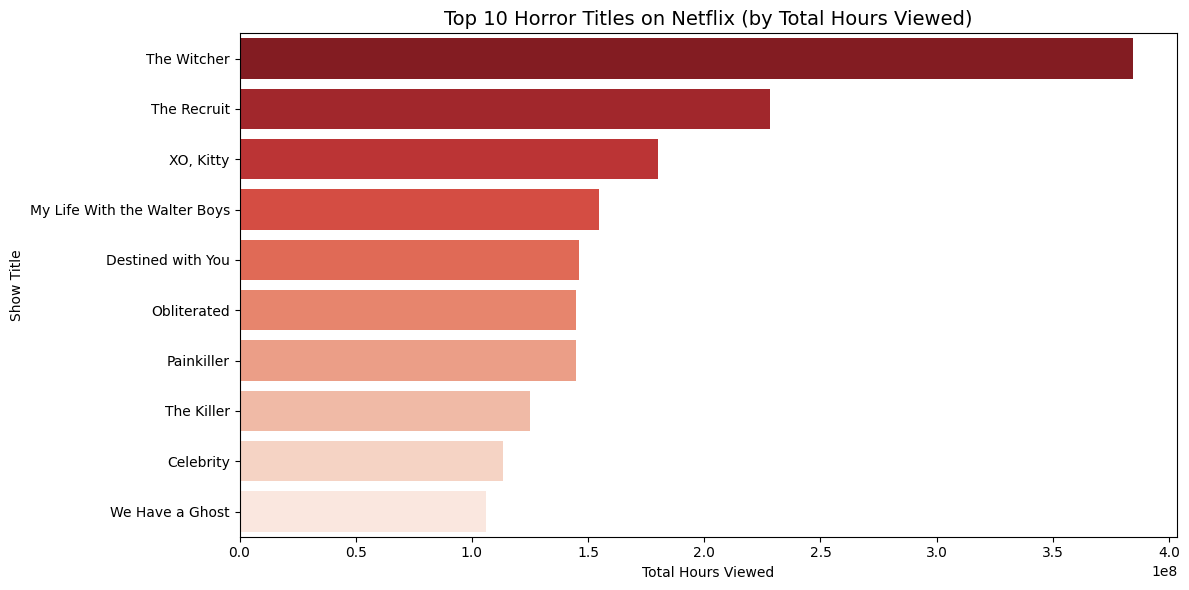

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_horror,
    x='weekly_hours_viewed',
    y='show_title',
    hue='show_title',  # Assign hue to match `y`
    palette='Reds_r',
    legend=False        # Hide legend since it's redundant
)

# Labels and title
plt.title("Top 10 Horror Titles on Netflix (by Total Hours Viewed)", fontsize=14)
plt.xlabel("Total Hours Viewed")
plt.ylabel("Show Title")
plt.tight_layout()
plt.show()


In [34]:
last_year_df[last_year_df['is_horror'] == True].groupby('category')['weekly_hours_viewed'].sum()


category
Films (English)         759910000
Films (Non-English)     188060000
TV (English)           1689750000
TV (Non-English)        681600000
Name: weekly_hours_viewed, dtype: int64

/tmp/ipykernel_12323/2279952374.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=horror_by_category, x='weekly_hours_viewed', y='category', palette='magma')


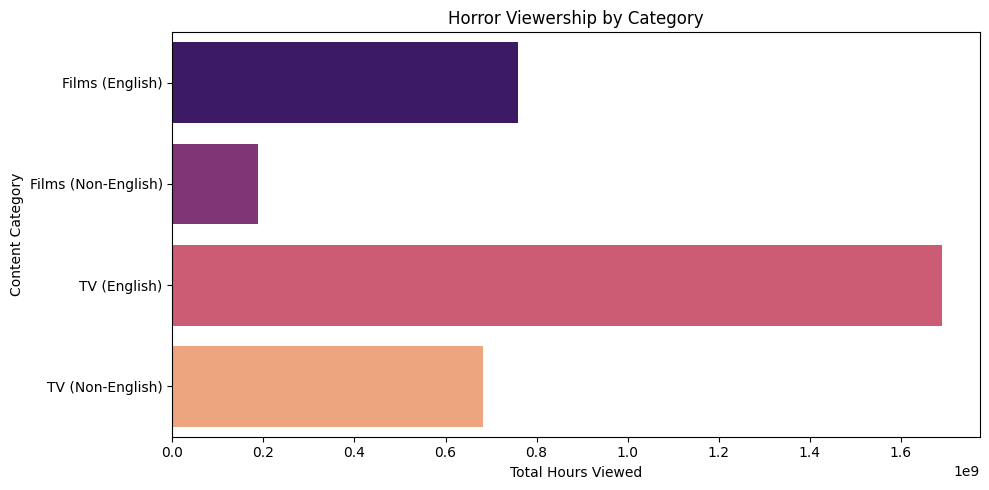

In [35]:
# Filter horror only
horror_by_category = last_year_df[last_year_df['is_horror'] == True].groupby('category')['weekly_hours_viewed'].sum().reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.barplot(data=horror_by_category, x='weekly_hours_viewed', y='category', palette='magma')

plt.title("Horror Viewership by Category")
plt.xlabel("Total Hours Viewed")
plt.ylabel("Content Category")
plt.tight_layout()
plt.show()


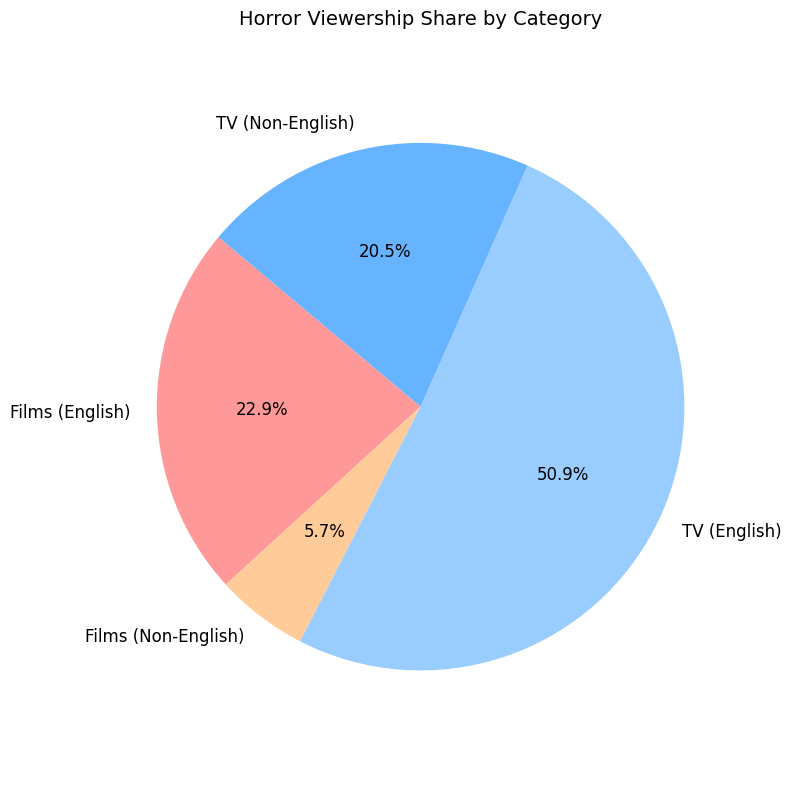

In [37]:
import matplotlib.pyplot as plt

# Labels and values
labels = horror_by_category['category']
sizes = horror_by_category['weekly_hours_viewed']

# Improved colors (manually set)
colors = ['#FF9999', '#FFCC99', '#99CCFF', '#66B3FF']

# Plot
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'color': 'black', 'fontsize': 12}
)
plt.title("Horror Viewership Share by Category", fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


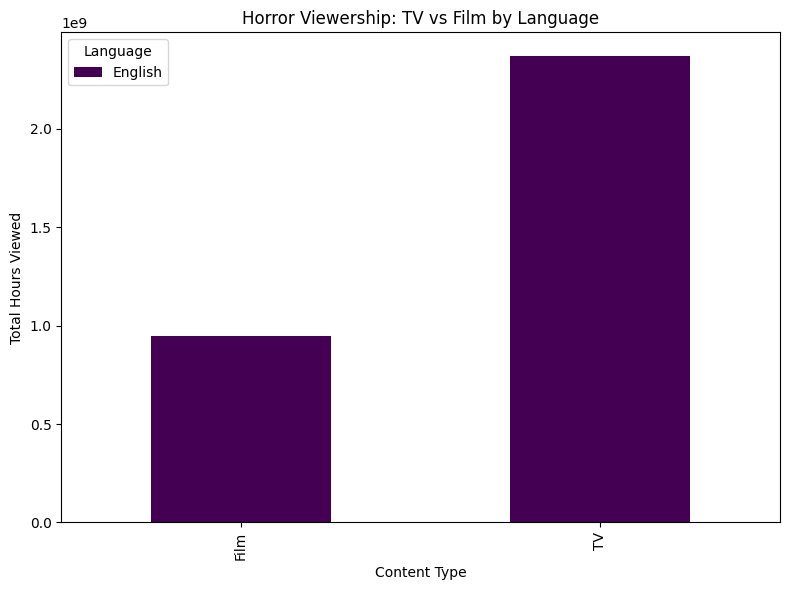

In [38]:
# Create 'type' and 'language' columns from 'category'
pivot = last_year_df[last_year_df['is_horror'] == True].copy()
pivot['type'] = pivot['category'].apply(lambda x: 'TV' if 'TV' in x else 'Film')
pivot['language'] = pivot['category'].apply(lambda x: 'English' if 'English' in x else 'Non-English')

# Group and pivot
stacked = pivot.groupby(['type', 'language'])['weekly_hours_viewed'].sum().unstack()

# Plot
stacked.plot(kind='bar', stacked=True, colormap='viridis', figsize=(8,6))

# Labels and title
plt.title("Horror Viewership: TV vs Film by Language")
plt.xlabel("Content Type")
plt.ylabel("Total Hours Viewed")
plt.legend(title='Language')
plt.tight_layout()
plt.show()


In [39]:
# Group by is_horror and calculate mean weeks in top 10
rewatchability = last_year_df.groupby('is_horror')['cumulative_weeks_in_top_10'].mean().reset_index()

# Rename for clarity
rewatchability.columns = ['is_horror', 'avg_weeks_in_top_10']
rewatchability


,is_horror,avg_weeks_in_top_10
0,False,3.068571
1,True,2.338462


/tmp/ipykernel_12323/2053965480.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rewatchability, x='is_horror', y='avg_weeks_in_top_10', palette='coolwarm')


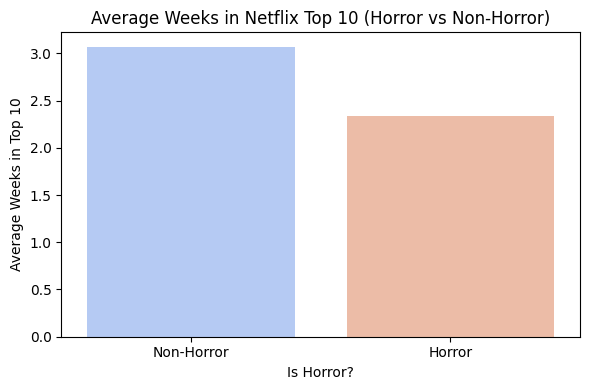

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.barplot(data=rewatchability, x='is_horror', y='avg_weeks_in_top_10', palette='coolwarm')
plt.title("Average Weeks in Netflix Top 10 (Horror vs Non-Horror)")
plt.xlabel("Is Horror?")
plt.ylabel("Average Weeks in Top 10")
plt.xticks([0, 1], ['Non-Horror', 'Horror'])
plt.tight_layout()
plt.show()


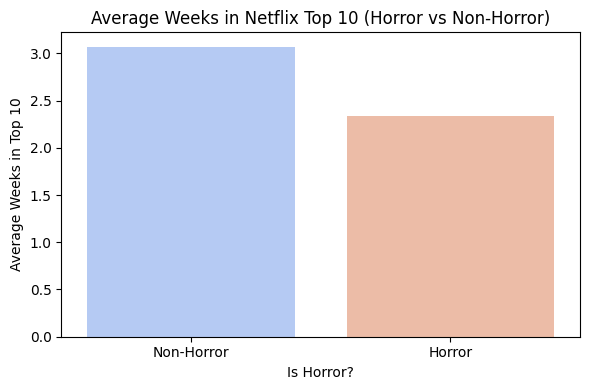

In [41]:
plt.figure(figsize=(6, 4))
sns.barplot(
    data=rewatchability,
    x='is_horror',
    y='avg_weeks_in_top_10',
    hue='is_horror',       # Add this
    palette='coolwarm',
    legend=False           # Hide legend (since axis already labels it)
)

plt.title("Average Weeks in Netflix Top 10 (Horror vs Non-Horror)")
plt.xlabel("Is Horror?")
plt.ylabel("Average Weeks in Top 10")
plt.xticks([0, 1], ['Non-Horror', 'Horror'])
plt.tight_layout()
plt.show()


In [42]:
# Extract horror titles
horror_df = last_year_df[last_year_df['is_horror'] == True].copy()

# Extract month for grouping
horror_df['month'] = horror_df['week'].dt.month_name()

# Group by month (sum total horror views)
monthly_views = horror_df.groupby('month')['weekly_hours_viewed'].sum().reset_index()

# Optional: sort months in calendar order
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]
monthly_views['month'] = pd.Categorical(monthly_views['month'], categories=month_order, ordered=True)
monthly_views = monthly_views.sort_values('month')


In [43]:
print(monthly_views)

        month  weekly_hours_viewed
4     January            345890000
3    February            126130000
7       March            107040000
0       April             66580000
8         May            273770000
6        June             97050000
5        July            603400000
1      August            347100000
11  September            195000000
10    October            288000000
9    November            196900000
2    December            672460000


In [44]:
# Use only horror titles with both runtime and views
runtime_df = horror_df.dropna(subset=['runtime', 'weekly_views'])

# Check how many valid rows we have
print(f"Valid entries for runtime vs views: {len(runtime_df)}")


Valid entries for runtime vs views: 126


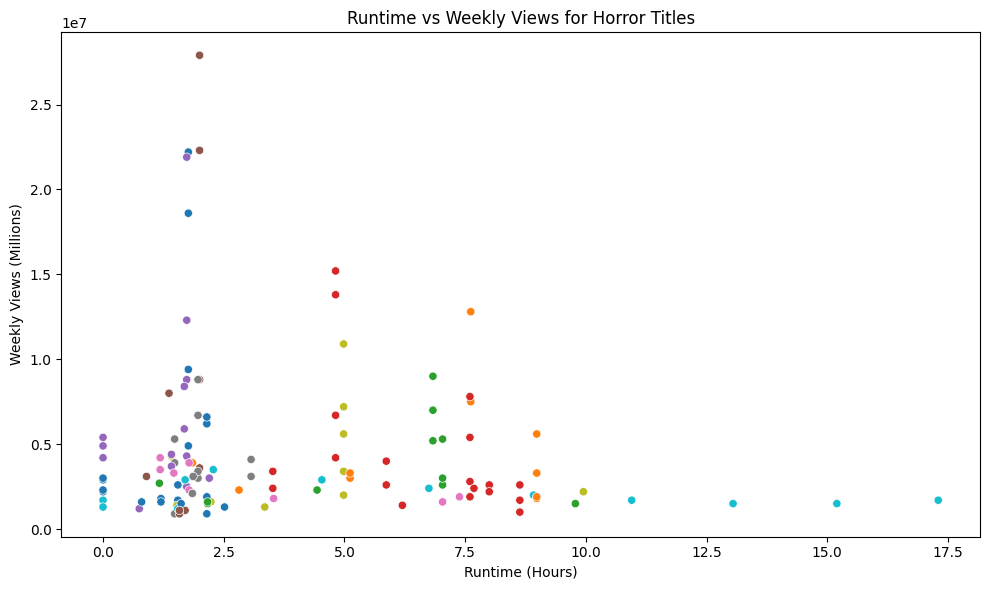

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=runtime_df, x='runtime', y='weekly_views', hue='show_title', legend=False, palette='tab10')

plt.title("Runtime vs Weekly Views for Horror Titles")
plt.xlabel("Runtime (Hours)")
plt.ylabel("Weekly Views (Millions)")
plt.tight_layout()
plt.show()


In [47]:
# ...existing code...

# List of top titles and their total hours viewed (for report)
top_titles = [
    {"show_title": "The Witcher", "hours_viewed_millions": 384},
    {"show_title": "The Recruit", "hours_viewed_millions": 228},
    {"show_title": "XO, Kitty", "hours_viewed_millions": 180},
    # ... (Include full list in final report)
]

# Convert to DataFrame for display or further analysis
top_titles_df = pd.DataFrame(top_titles)
print(top_titles_df)

# ...existing code...

    show_title  hours_viewed_millions
0  The Witcher                    384
1  The Recruit                    228
2    XO, Kitty                    180


In [49]:
# ## Final Notes
print("✅ Netflix Horror Analysis Completed Successfully. Charts and trends ready for export.")

✅ Netflix Horror Analysis Completed Successfully. Charts and trends ready for export.
